#### Notebook style configuration <span style="font-weight:200;">(optional)</span>


### Table of contents <a name="TOC"></a>

* [Introduction](#introduction)
* [Single axes](#single_axes)
* [Multiple axes](#multiple_axes)
* [Catalogue of useful plots](#catalogue)

# 1. Introduction <a name="introduction"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this introduction, we'll see how to make a [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) and play with the different settings such as to improve the rendering. We'll also see how to compose a figure made of several [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) with a moderatly complex layout.



<img src="dataviz-data/anatomy_new.png" width="50%" align="left" /> <img src="dataviz-data/subplots.png" width="50%" />


These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets). All credit goes to [Nicolas P. Rougier](https://github.com/rougier), who has also written an amazing book on [scientific visualization using Python and matplotlib](https://github.com/rougier/scientific-visualization-book).

This year, however, the course differs from last year in that we will be using [Seaborn](https://seaborn.pydata.org/). Seaborn is a layer on top of Matplotlib, which provides a real simplification of creating charts. Nowadays, while Matplotlib remains the standard, Seaborn is being used more and more.
Today we will see how Seaborn and matplolib can be used together to bring the best out of your graphics


---

# 2. Single axes <a name="single_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

We'll start by playing with a very simple exampe (sine and cosine trigonometric functions) using the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function and see what options are avalaible to us. We'll see there exists a (very) large number of options that allow to obtain quite different outputs. More precisely, you can modify any aspect of a figure and obtain the precise rendering you've in mind. The only difficulty is to know what are these options and how to apply them.

**Note** The standard way of importing maplotlib is to write `import matplotlib.pyplot as plt` and then use the `plt` prefix in front of matplotlib related functions. In some rather rare cases, we also use the `matplotlib` prefix, but most of the time we only need `plt`. In the same way, the seaborn module can be imported by writing `import seaborn as sns`.


## 2.1 Data preparation

Before starting any plot, we need first to have some data to plot. Such data can originate from your own experiment or analysis but for the sake of simplicity, we'll generate our own data using the [numpy](https://numpy.org) library. For the sine and cosine functions, we simply generate 257 values linearly spaced between -π and +π and we compute the sine and cosine of these values.

In [3]:
import numpy as np

N = 257
# Todo: generate a numpy array from - pi to + pi containing N points.
X = np.linspace(-np.pi, np.pi, N, endpoint=True)  
C, S = np.cos(X), np.sin(X)

X is now a numpy array with 257 values ranging from -π to +π (included). C is the cosine (257 values) and S is the sine (257 values). We're ready to plot them.

**Exercise together:** Why "endpoint = True" is doing in our case?

**Answer:**

## 2.2 Plotting with defaults

Let's draw our first figure and observe what the result looks like.

<Axes: >

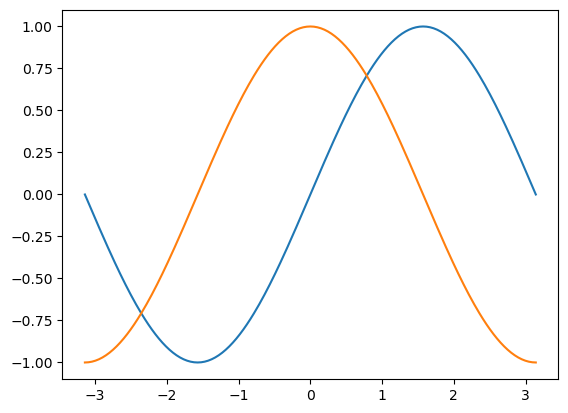

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=X, y=S)
sns.lineplot(x=X, y=C)
plt.show



**Exercise together:** What aspects of this plot could be improved?

**Answer:**

**Exercise together:** We chose the value `257` arbitrarily. But what if we had chosen fewer points? The plot is below--why does it look like what it does? What does this mean for plotting? What if I plotted 25,700 points instead?

In [6]:
Xfew = np.linspace(-np.pi, np.pi, 8, endpoint=True)
Cfew, Sfew = np.cos(Xfew), np.sin(Xfew)


<function matplotlib.pyplot.show(close=None, block=None)>

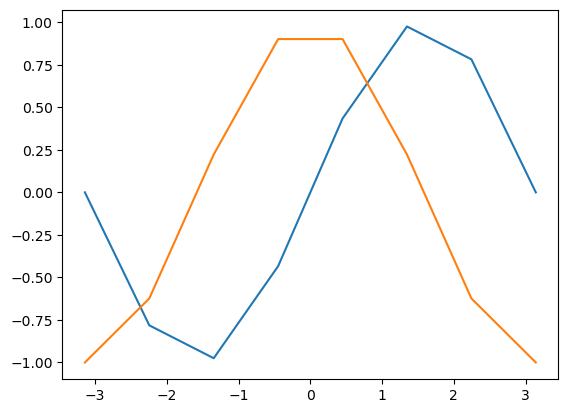

In [7]:

sns.lineplot(x=Xfew, y=Sfew)
sns.lineplot(x=Xfew, y=Cfew)
plt.show

**Answer:** 


## 2.3 Customizing the plot

Let's modify the plot to make it look nicer (and convey more information about our data).

#### Adjusting the figure size

Let's start by making the figure a bit larger. We will use the parameter `figsize` to denote the size of our figure as `(width, height)`, which is a tuple of float values, in inches.

<function matplotlib.pyplot.show(close=None, block=None)>

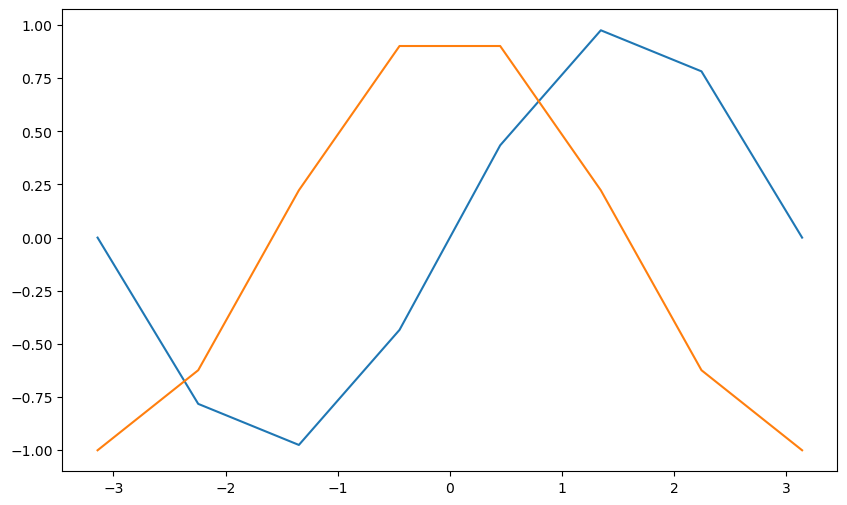

In [8]:
plt.figure(figsize=(10, 6))  # Width=10, Height=6 (adjust these as needed)


sns.lineplot(x=Xfew, y=Sfew)
sns.lineplot(x=Xfew, y=Cfew)
plt.show

Note: to make this change pernanent in *all* of our subsequent figures, we will set the _global parameters_ of `matplotlib`

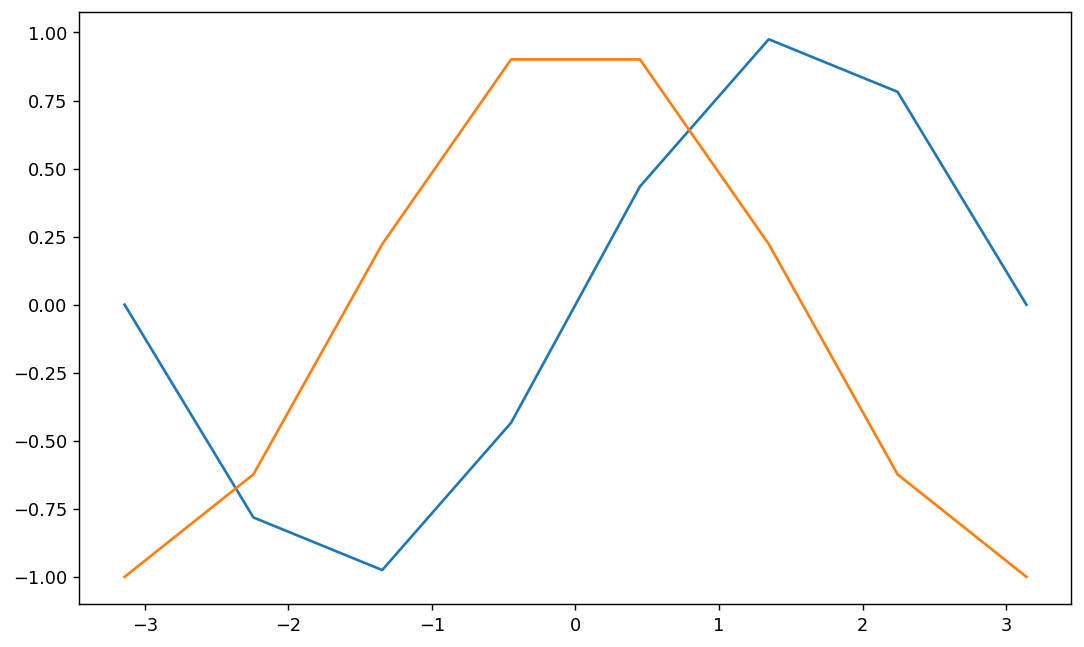

In [9]:
# Set default figure size 
plt.rcParams["figure.figsize"] = (10,6)

# Set default figure dpi
plt.rcParams["figure.dpi"] = 128

# Make a new figure, note that it has the same size as the figure before without using figsize!
fig_new = plt.figure()

sns.lineplot(x=Xfew, y=Sfew)
sns.lineplot(x=Xfew, y=Cfew)

plt.show();

#### Line styles

Solid line is the default line style but there exist [several other styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) such as dashed lines (`linestyle="--"`), dotted lines (`linestyle=":"`), etc. You can also combine a style with a marker. For example, we can add circular markers at regular intervals. To do that, we specify the `marker` symbol as `'o'`, the marker color and the spacing between markers (else you will have a marker at each data  point).  Look [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) for more linestyle examples

<Axes: >

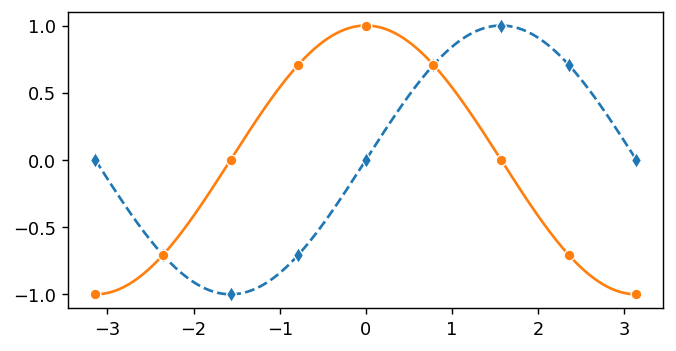

In [10]:
plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


sns.lineplot(x=X, y=S, linestyle="--", marker = 'd', markevery=32)
sns.lineplot(x=X, y=C, marker = 'o', markevery=32) #TODO: what if just marker 'o' and not markevery



You can find a more complete list of markers [here](https://python-graph-gallery.com/41-control-marker-features/)

#### Tick positions and labels

Ticks on the x axis are not ideal positioned because they do not show the interesting values (+/-$\pi$,+/-$\pi$/2) and there are too many ticks on the y axis. Moreover, it would be more interesting to express them in multiples of pi.

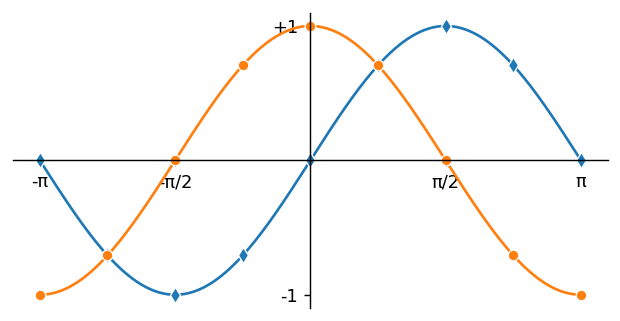

In [11]:
plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32)
sns.lineplot(x=X, y=C, marker = 'o', markevery=32) #TODO: what if just marker 'o' and not markevery

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines, and set theire position
sns.despine(top=True, right=True, left=False, bottom=False, offset = [-100,-50] )

# Set the bottom and left positions to the center of the figure with Matplotlib
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

#Todo, plot a graph with a spine located at the top right.

#### Z order

Now that our spines overlap our lines, we can see that the axes are plotted on top the lines. It was already the case previosuly but it was less noticeable. Now with the markers, it is more obvious and pretty annoying. To fix the problem, we need to tell matplotlib to render our sine and cosine plots in front of the axis. To do so, we need to specify a zorder that specify the order of rendering. Elements are rendererd in increasing zorder.

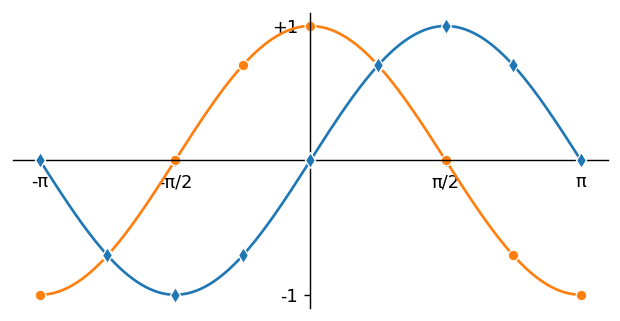

In [12]:
 plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32, zorder=10)
sns.lineplot(x=X, y=C, marker = 'o', markevery=32) #TODO: what if just marker 'o' and not markevery

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))



#### Legend

Matplotlib and Seaborn allows adding legends with [a great degree of control](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html). For now, we will add a simple legend in the upper left-hand corner. We do this by labelling the data we plot (i.e., adding the keyword argument `label` into our `plot` function) and then calling `ax.legend`.

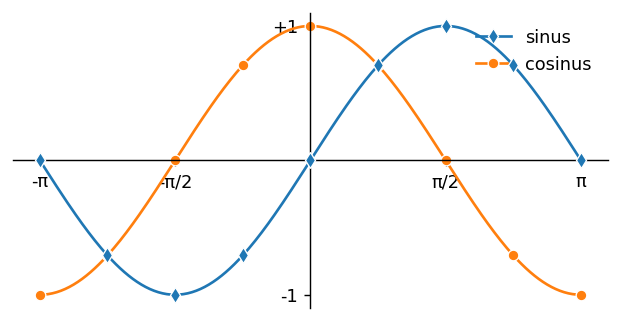

In [13]:
 plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32, zorder=10, label = 'sinus')
ax = sns.lineplot(x=X, y=C, marker = 'o', markevery=32, label = 'cosinus') #TODO: what if just marker 'o' and not markevery

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper right', frameon=False);


    


#### Font size

The font size of the tick labels is a bit small. Let's increase it a bit.

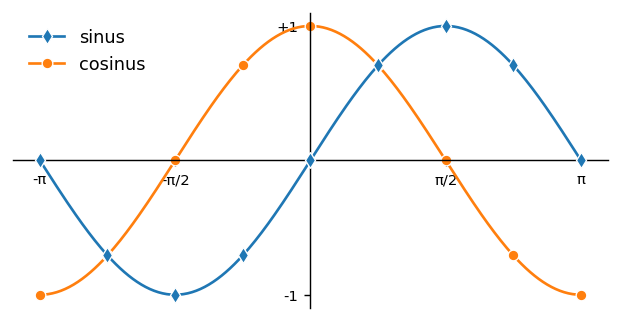

In [14]:
 plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32, zorder=10, label = 'sinus')
ax = sns.lineplot(x=X, y=C, marker = 'o', markevery=32, label = 'cosinus') #TODO: what if just marker 'o' and not markevery

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("small");
    


#### Title

We're almost done. Let's now add a title on the left of our figure.

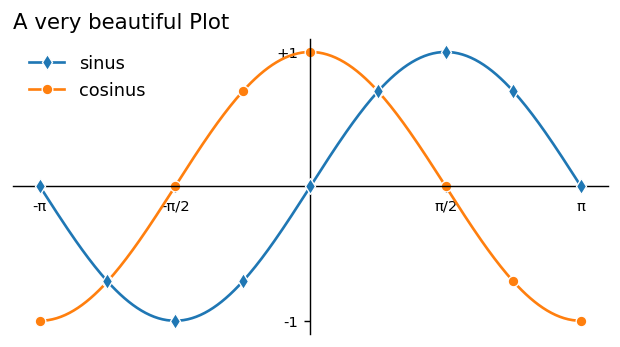

In [15]:
 plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32, zorder=10, label = 'sinus').set_title('A very beautiful Plot', loc='left')
ax = sns.lineplot(x=X, y=C, marker = 'o', markevery=32, label = 'cosinus') 

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("small");



In [13]:
pwd

'C:\\Users\\adrib\\Documents\\Administration\\Enseignement\\ProgData\\Jupyter_Notebooks\\Jupyter Notebooks'

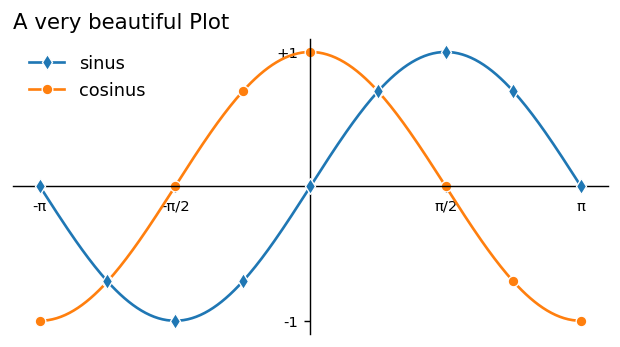

In [16]:
 plt.figure(figsize=(6, 3))  # Width=10, Height=6 (adjust these as needed)


ax = sns.lineplot(x=X, y=S,  marker = 'd', markevery=32, zorder=10, label = 'sinus').set_title('A very beautiful Plot', loc='left')
ax = sns.lineplot(x=X, y=C, marker = 'o', markevery=32, label = 'cosinus') 

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])

ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("small");

plt.savefig("./a_beautiful_graph.pdf")


---

#  3. Multiple axes <a name="multiple_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

So far, we've been dealing with a single axes  on a figure, but of course, Matplotlib/Seaborn offers the possibility to draw several plots on the same figure. The only difficulty is to express the layout of these different plots. But let's start with someting simple first.

We want to split our sine and cosine plot in two different plots side by side. To do that we need to create two axes. The most straigthforward way is to use the `plt.subplots` method to create subplots with the specified rows and colums. This method returns an array of axes that you can index to access the axes of your choice. You can also use the `plt.subplot` method, which is similar to the Matlab `subplot` function.

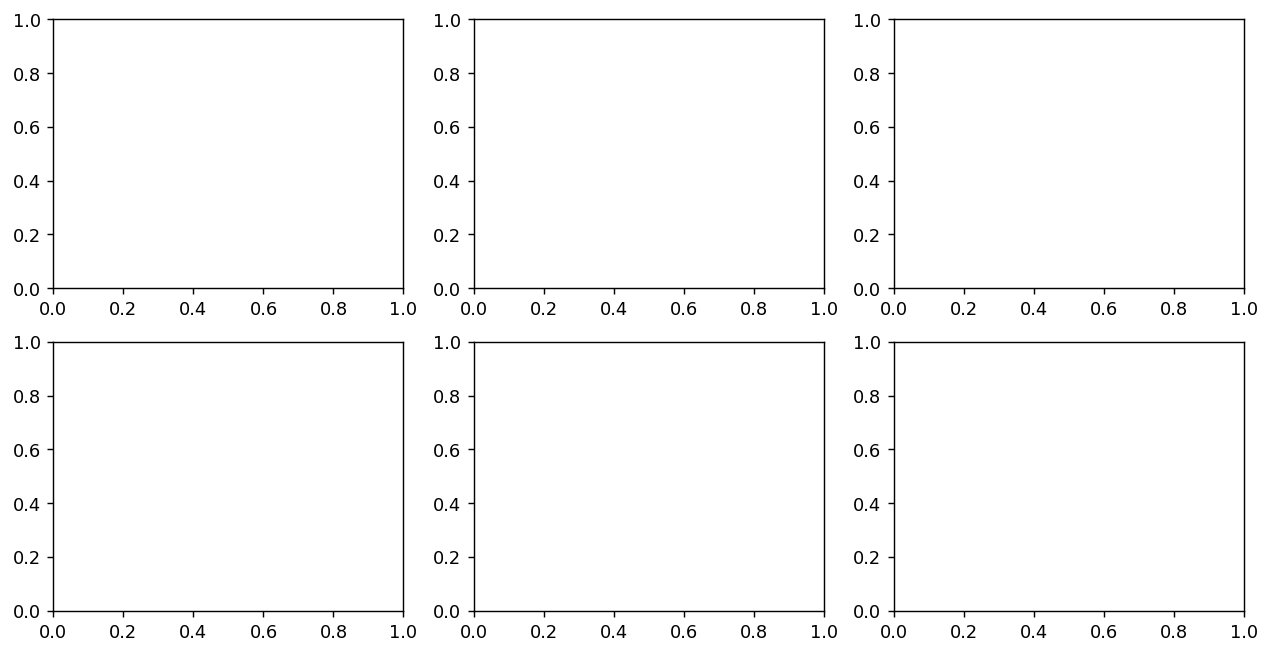

In [18]:

# Set up the number of rows and columns for subplots
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6))


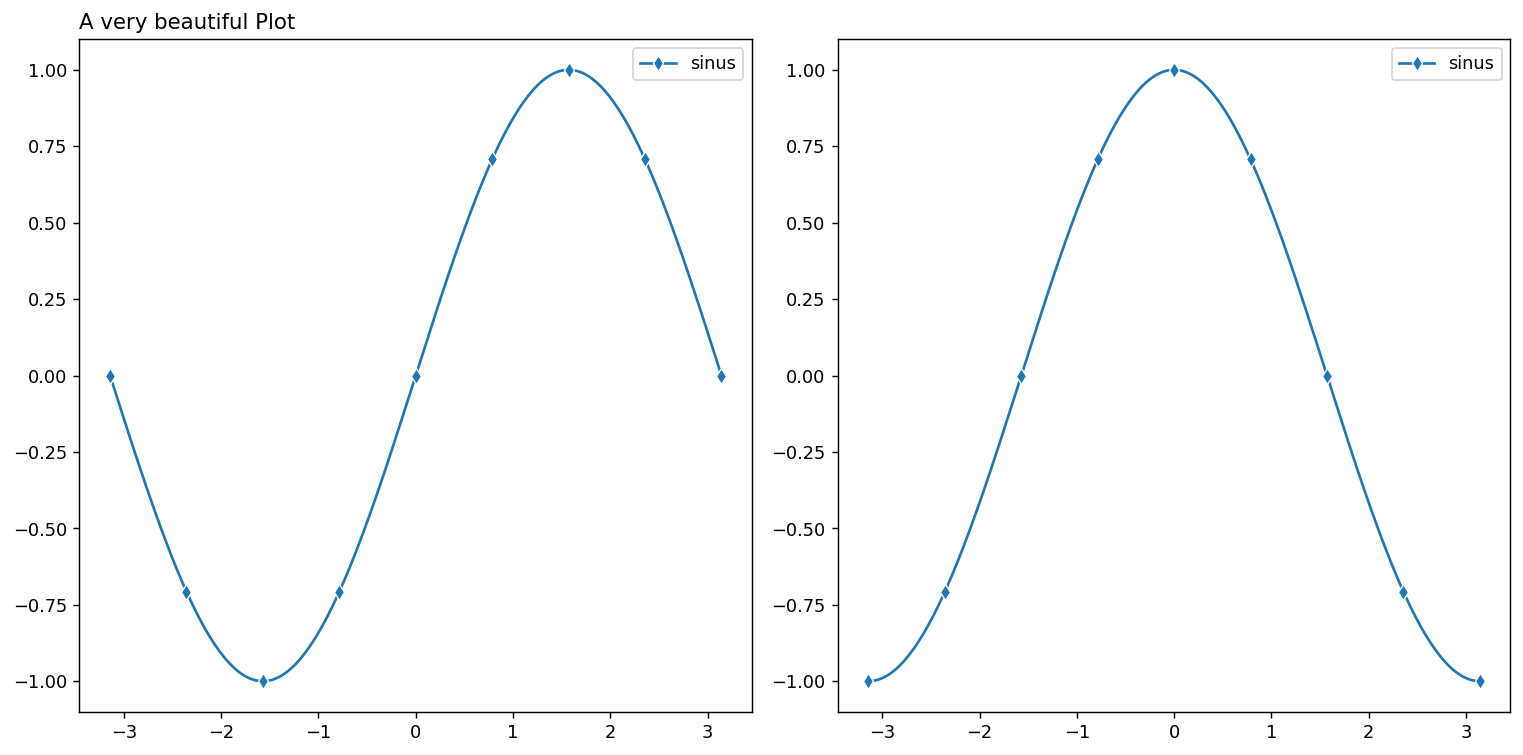

In [23]:

# Set up the number of rows and columns for subplots
nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6))

sns.lineplot(ax=axs[0],x=X, y=S,  marker = 'd', markevery=32, zorder=10, label = 'sinus').set_title('A very beautiful Plot', loc='left')
sns.lineplot(ax=axs[1],x=X, y=C,  marker = 'd', markevery=32, zorder=10, label = 'sinus')



# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



---

# 4.  Catalogue of useful plots <a name="catalogue"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this lesson, we'll review a few of the many different types of plot matplotlib/seaborn offers and manipulate them.
These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).
Seaborn equivalent could be found here: [https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)


<img src="dataviz-data/plot-basic.png" width="50%" align="right" /> <img src="dataviz-data/plot-advanced.png" width="50%" />



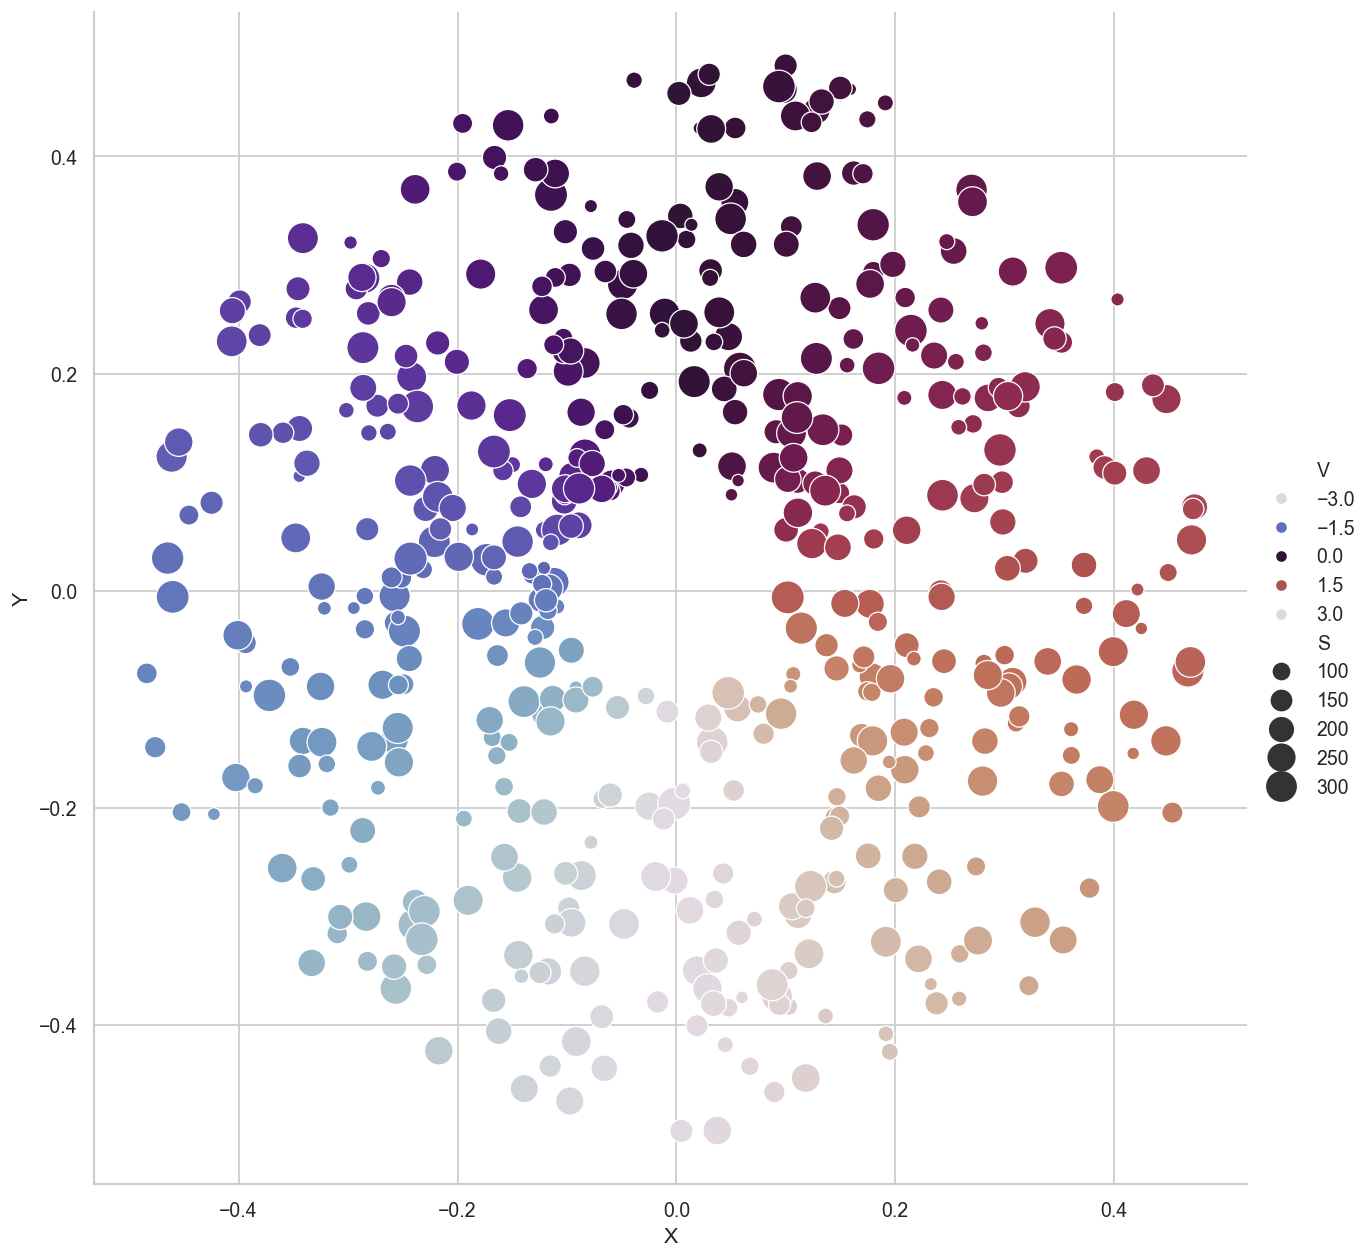

In [24]:
import pandas as pd

# Generate data
T = np.random.uniform(0, 2 * np.pi, 500)
R = np.random.uniform(0.1, 0.5, len(T))
X, Y = R * np.cos(T), R * np.sin(T)   # Position
S = np.random.uniform(50, 350, len(X)) # Size
V = np.arctan2(X, Y)                  # Value (for hue)


# Create a dataframe for Seaborn
data = pd.DataFrame({'X': X, 'Y': Y, 'S': S, 'V': V})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the relplot with hue and size mapping
sns.relplot(x='X', y='Y', hue='V', size='S', sizes=(50, 350),
            data=data, palette="twilight", edgecolor="white", height=10, aspect=1)

# Show the plot
plt.show()


In the example above, each marker possesses its own size and color (using a colormap based on point angle). We could even specify individual marker type.

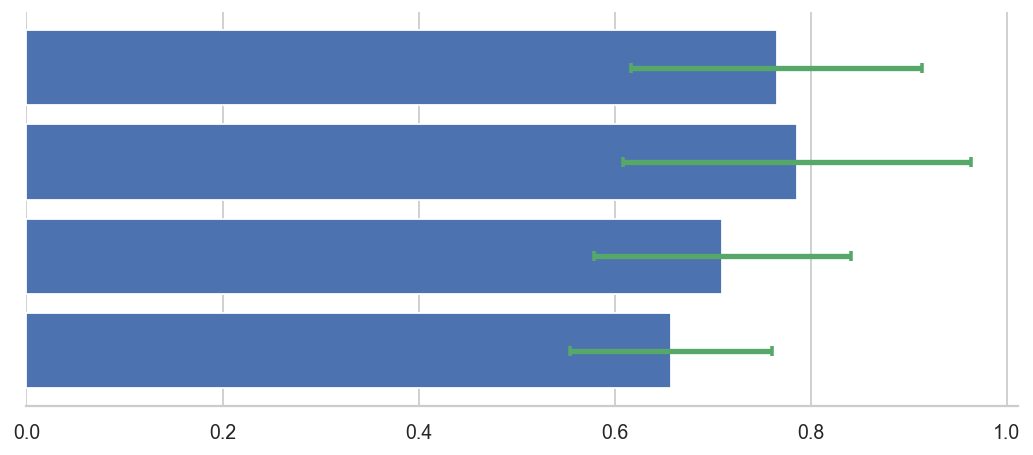

In [30]:
np.random.seed(1)
X = np.arange(0,4)
Y = np.random.uniform(0.5, 1.0, (len(X),10))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot();

ax.bar(X, Y.mean(axis=1), color="C0", yerr=Y.std(axis=1), 
       error_kw=dict(ecolor="C2", linewidth=3, capsize=3, capthick=2))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xticks(X)
ax.set_yticks([])

plt.show();

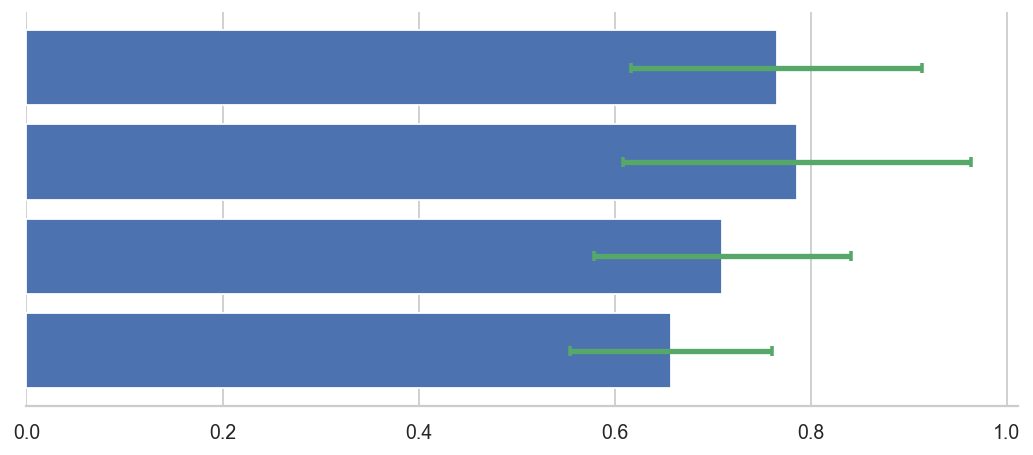

In [31]:
np.random.seed(1)
X = np.arange(0,4)
Y = np.random.uniform(0.5, 1.0, (len(X),10))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot();

ax.barh(X, Y.mean(axis=1), color="C0", xerr=Y.std(axis=1), 
       error_kw=dict(ecolor="C2", linewidth=3, capsize=3, capthick=2))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xticks(X)
ax.set_yticks([])

plt.show();